# Part 1 - Cleaning numerical data

1. Import the necessary libraries.

In [799]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [800]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info)

In [801]:
pd.set_option('display.max_columns', 50)
customer_df.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [802]:
customer_df.shape

(9134, 24)

In [803]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [804]:
round(customer_df.isnull().sum()/len(customer_df),3)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

4. Then rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [805]:
# Start with the lower case :
customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [806]:
# Then replace white spaces by underscores

def clean_underscore(x) :
    if " " in x :
        return x.replace(" ", "_")
    else : 
        return x

In [807]:
customer_df.columns = list(map(clean_underscore, customer_df.columns))
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [808]:
def clean_dateformat(x) :
    return pd.to_datetime(x, errors = 'coerce')

customer_df.effective_to_date = list(map(clean_dateformat, customer_df.effective_to_date))
print(customer_df.effective_to_date.dtypes)
customer_df.effective_to_date.head()

datetime64[ns]


0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

6. Define a function that differentiates between continuous and discrete variables. 
Hint: The number of unique values might be useful. 
Store continuous data into a continuous_df variable and do the same for discrete_df

In [809]:
# Let's first divide the dataframe into numerical / categorical data

numericals = customer_df.select_dtypes(np.number)
display(numericals.head())
categoricals = customer_df.select_dtypes(np.object)
display(categoricals.head())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/3089496711.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [810]:
# Let's check unique values for numericals using a loop :
for col in numericals.columns :
    print("The number of unique values for",col, "is :", numericals[col].nunique())

The number of unique values for customer_lifetime_value is : 8041
The number of unique values for income is : 5694
The number of unique values for monthly_premium_auto is : 202
The number of unique values for months_since_last_claim is : 36
The number of unique values for months_since_policy_inception is : 100
The number of unique values for number_of_open_complaints is : 6
The number of unique values for number_of_policies is : 9
The number of unique values for total_claim_amount is : 5106


In [811]:
def split_dataframe(df, number_uniques = 10) : 
    df2 = df.copy()
    continuous_list = []
    discrete_list = []
    for col in list(df2.columns) :
        if (df2[col].nunique() > 10) : 
            continuous_list.append(col)
        else : 
            discrete_list.append(col) 
    continuous_df = df2[continuous_list]
    discrete_df = df2[discrete_list]
    return continuous_df, discrete_df

In [812]:
continuous_df, discrete_df = split_dataframe(numericals,10)
display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


7. Plot a correlation matrix, comment what you see.

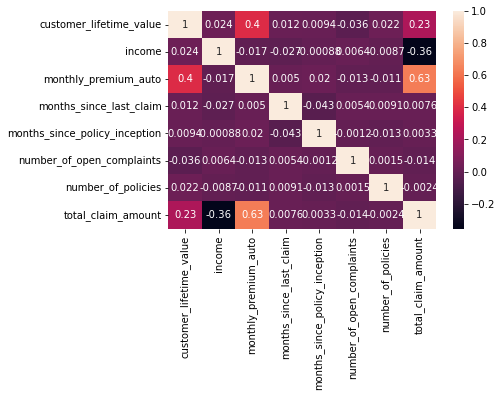

In [813]:
corr_matrix = numericals.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

8. Create a function to plot every discrete variable. Do the same with the continuous variables 
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


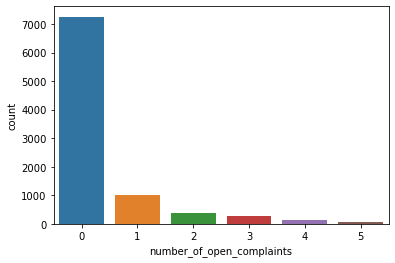

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


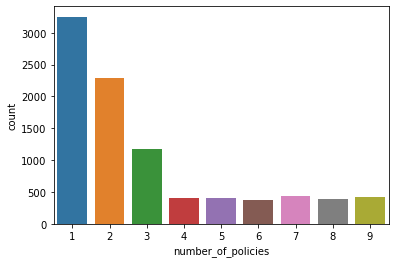

number_of_open_complaints    None
number_of_policies           None
dtype: object

In [814]:
def plot_discrete(x) :
    sns.countplot(x)
    plt.show()
    
discrete_df.apply(plot_discrete)

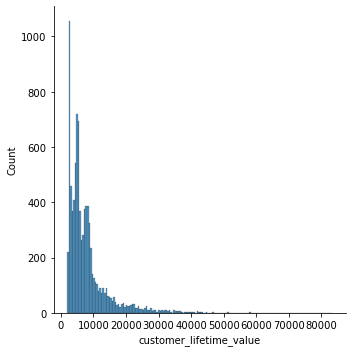

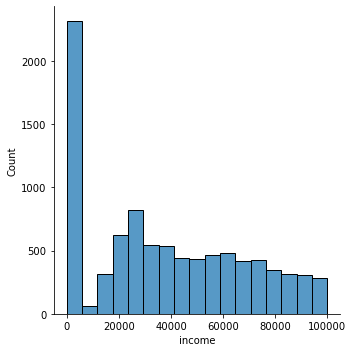

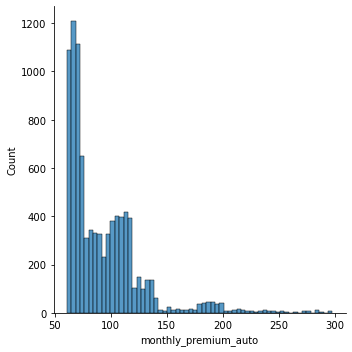

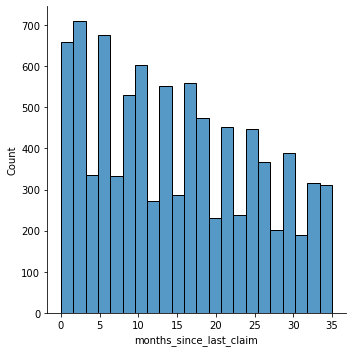

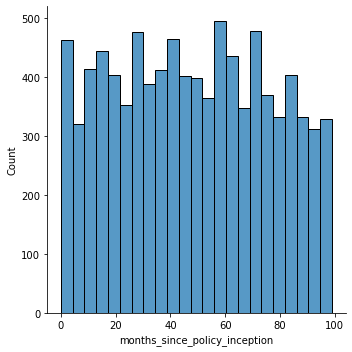

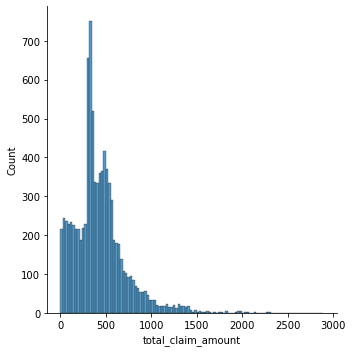

customer_lifetime_value          None
income                           None
monthly_premium_auto             None
months_since_last_claim          None
months_since_policy_inception    None
total_claim_amount               None
dtype: object

In [815]:
def plot_continuous(x) :
    sns.displot(x)
    plt.show()
    
continuous_df.apply(plot_continuous)

9. Comment what you can see in the plots.

In [816]:
# Let's have a closer look to income :
low_income = customer_df[customer_df['income'] == 0]
low_income

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
10,SX51350,California,4738.992022,No,Basic,College,2011-02-21,Unemployed,M,0,Suburban,Single,67,23,5,0,3,Personal Auto,Personal L3,Offer1,Agent,482.400000,Four-Door Car,Small
11,VQ65197,California,8197.197078,No,Basic,College,2011-01-06,Unemployed,F,0,Suburban,Married,110,27,87,0,3,Personal Auto,Personal L3,Offer2,Agent,528.000000,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small
9125,RX91025,California,19872.262000,No,Premium,High School or Below,2011-01-31,Unemployed,M,0,Suburban,Single,185,26,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4628.995325,No,Basic,Bachelor,2011-01-09,Unemployed,M,0,Suburban,Single,67,25,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [817]:
low_income['employmentstatus'].value_counts()

# these incomes equal to 0 correspond to the unemployed people. We want to keep them as it is

Unemployed    2317
Name: employmentstatus, dtype: int64

10. Look for outliers in the continuous variables. 
(HINT: There’s a good plot to do that!)

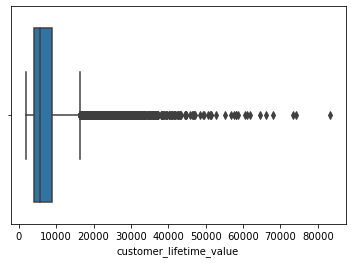

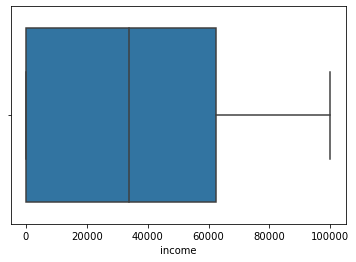

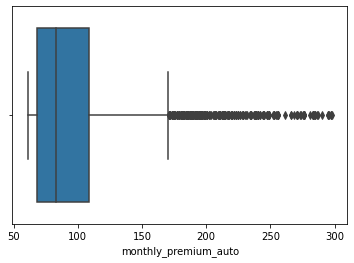

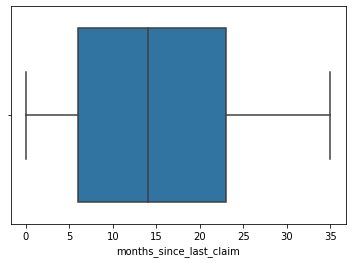

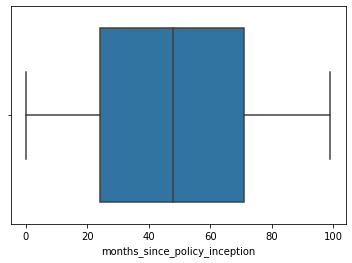

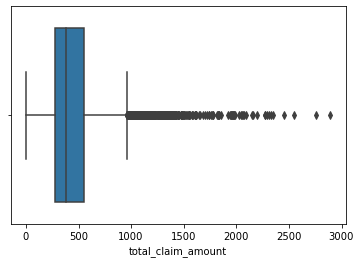

customer_lifetime_value          None
income                           None
monthly_premium_auto             None
months_since_last_claim          None
months_since_policy_inception    None
total_claim_amount               None
dtype: object

In [818]:
def plot_outliers(x) :
    sns.boxplot(x = x)
    plt.show()
    
continuous_df.apply(plot_outliers)

11. Did you find outliers? Comment what you will do with them.

In [819]:
# Let's check for each variable what these outliers represent in terms of proportion :

# For customer_lifetime_value, with 90% percentiles :
iqr1 = np.percentile(continuous_df['customer_lifetime_value'],90) - np.percentile(continuous_df['customer_lifetime_value'],10)
upper_limit1 = np.percentile(continuous_df['customer_lifetime_value'],90) + 1.5*iqr1
print("Outliers start with the value :", upper_limit1)

outliers1 = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit1]
print("The number of outliers for customer_lifetime_value is :", len(outliers1))
print("In % :", round(len(outliers1)/len(continuous_df)*100,2))


Outliers start with the value : 34590.826513100015
The number of outliers for customer_lifetime_value is : 114
In % : 1.25


In [820]:
# For monthly_premium_auto :
iqr2 = np.percentile(continuous_df['monthly_premium_auto'],90) - np.percentile(continuous_df['monthly_premium_auto'],10)
upper_limit2 = np.percentile(continuous_df['monthly_premium_auto'],90) + 1.5*iqr2
print("Outliers start with the value :", upper_limit2)

outliers2 = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit2]
print("The number of outliers for monthly_premium_auto is :", len(outliers2))
print("In % :", round(len(outliers2)/len(continuous_df)*100,2))

Outliers start with the value : 226.5
The number of outliers for monthly_premium_auto is : 93
In % : 1.02


In [821]:
# For total_claim_amount :
iqr3 = np.percentile(continuous_df['total_claim_amount'],90) - np.percentile(continuous_df['total_claim_amount'],10)
upper_limit3 = np.percentile(continuous_df['total_claim_amount'],90) + 1.5*iqr3
print("Outliers start with the value :", upper_limit3)

outliers3 = continuous_df[continuous_df['total_claim_amount'] > upper_limit3]
print("The number of outliers for total_claim_amount is :", len(outliers3))
print("In % :", round(len(outliers3)/len(continuous_df)*100,2))

Outliers start with the value : 1777.45647645
The number of outliers for total_claim_amount is : 38
In % : 0.42


12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [822]:
round(customer_df.isnull().sum()/len(customer_df),3)
# There are no NaN's values. 

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Part 2 - Cleaning categorical data

1. Find all of the categorical data. Save it in a categorical_df variable.

In [823]:
categoricals = customer_df.select_dtypes(np.object)
display(categoricals.head())

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/2208350279.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Check for NaN values.

In [824]:
categoricals.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

3. Check all unique values of columns.

In [825]:
display(categoricals.customer.value_counts())
display(categoricals.state.value_counts())
display(categoricals.response.value_counts())
display(categoricals.coverage.value_counts())
display(categoricals.education.value_counts())
display(categoricals.employmentstatus.value_counts())
display(categoricals.gender.value_counts())
display(categoricals.location_code.value_counts())
display(categoricals.marital_status.value_counts())
display(categoricals.policy_type.value_counts())
display(categoricals.policy.value_counts())
display(categoricals.renew_offer_type.value_counts())
display(categoricals.sales_channel.value_counts())
display(categoricals.vehicle_class.value_counts())
display(categoricals.vehicle_size.value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [826]:
# we can drop the columns : customer (makes no sense here) & policy (double / repeated info with policy_type)
categoricals = categoricals.drop(['customer', 'policy'], axis = 1)

4. Check dtypes. Do they all make sense as categorical data?


In [827]:
categoricals.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [828]:
def clean_education(x) :
    if x in ['Master', 'Doctor'] :
        return 'High Degree'
    else :
        return x

categoricals.education = categoricals.education.apply(clean_education)
categoricals.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
High Degree             1083
Name: education, dtype: int64

In [829]:
def clean_employment(x) :
    if x in ['Medical Leave', 'Retired', 'Disabled'] :
        return 'Not working'
    else :
        return x

categoricals.employmentstatus = categoricals.employmentstatus.apply(clean_employment)
categoricals.employmentstatus.value_counts()

Employed       5698
Unemployed     2317
Not working    1119
Name: employmentstatus, dtype: int64

In [830]:
def clean_vehicle_class(x) :
    if x in ['Luxury SUV', 'Luxury Car', 'Sports Car'] :
        return 'Luxury & Sports'
    else :
        return x

categoricals.vehicle_class = categoricals.vehicle_class.apply(clean_vehicle_class)
categoricals.vehicle_class.value_counts()

Four-Door Car      4621
Two-Door Car       1886
SUV                1796
Luxury & Sports     831
Name: vehicle_class, dtype: int64

5. Does any column contain alpha and numeric data? Decide how to clean it.

6. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

For the moment, I don't do anything because there are some ordinal data in our categorical data (see PART 3)
But I will encode my categorical data in two ways : onehot encoder + ordinal encoder

In [831]:
#from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(handle_unknown='error', drop='first')
#encoder.fit(categoricals)

#categoricals_encoded = encoder.transform(categoricals).toarray()

#categoricals_encoded = pd.DataFrame(categoricals_encoded, columns = encoder.get_feature_names_out())
#display(categoricals_encoded.head())

7. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [832]:
# 8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes
# I already did it in question 4 when I groupped underrepresented values in some of the columns.
# That was helpful for the OneHotEncoder step !

# But let's check once more the unique values for each columns, this time with a loop :
for col in categoricals.columns:
    print(col,": \n",categoricals[col].value_counts(),"\n" )

state : 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

response : 
 No     7826
Yes    1308
Name: response, dtype: int64 

coverage : 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

education : 
 Bachelor                2748
College                 2681
High School or Below    2622
High Degree             1083
Name: education, dtype: int64 

employmentstatus : 
 Employed       5698
Unemployed     2317
Not working    1119
Name: employmentstatus, dtype: int64 

gender : 
 F    4658
M    4476
Name: gender, dtype: int64 

location_code : 
 Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

marital_status : 
 Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

policy_type : 
 Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

renew_offer_type : 
 Offer1    

# PART 3 - Comparing regression models

2. We will start with removing outliers, if you have not already done so. 
We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe

>> I'll start with this step (instead of the X/y split of question 1 ) because I want to use this dataframe without outliers in the following questions

In [833]:
# we saw in part 1 that outliers are present in customer_lifetime_value + monthly_premium_auto + total_claim_amount
# they represent less than 1.5% of the dataset -> we will drop them
# I'll use the IQR method

In [834]:
def remove_outliers(df, q1_value = 20, q3_value = 80) :
    df2 = df.copy().astype(float)
    for col in df2.columns :
        iqr = np.percentile(df2[col], q3_value) - np.percentile(df2[col],q1_value)
        upper_limit = np.percentile(df2[col], q3_value) + 1.5*iqr
        df2 = df2[df2[col] < upper_limit]
    return df2

In [835]:
num_no_outliers = remove_outliers(continuous_df)
num_no_outliers.shape

(8160, 6)

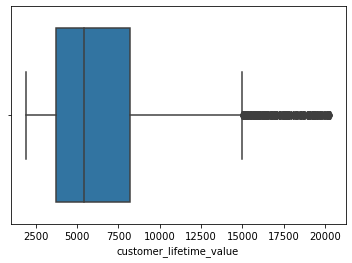

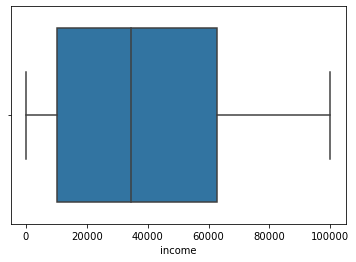

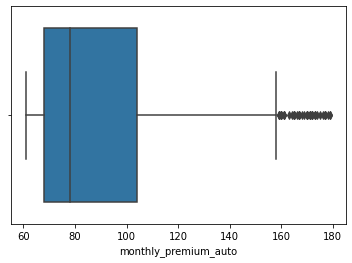

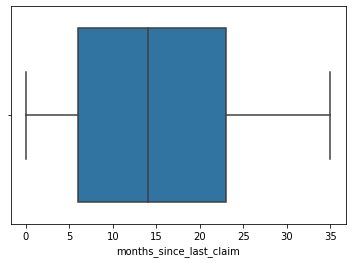

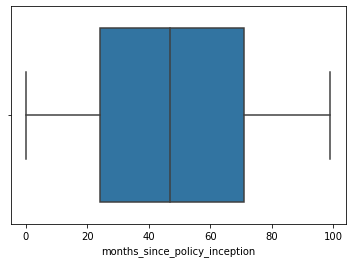

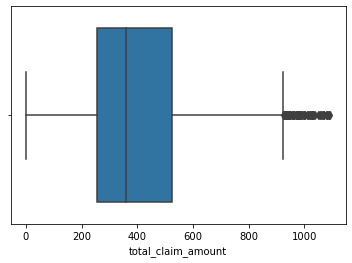

customer_lifetime_value          None
income                           None
monthly_premium_auto             None
months_since_last_claim          None
months_since_policy_inception    None
total_claim_amount               None
dtype: object

In [836]:
num_no_outliers.apply(plot_outliers)

6. The time variable can be useful. Try to transform its data into a useful one. 
Hint: Day week and month as integers might be useful.

>> Same here : I choose to handle this question before the X/y split to avoid having NaN's due to concatenating files with different number of rows

In [837]:
import datetime as dt
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['weekday'] = customer_df['effective_to_date'].dt.weekday

print(customer_df.columns)
print(customer_df.month.unique())
print(customer_df.month.dtypes)
print(customer_df.weekday.unique())
print(customer_df.weekday.dtypes)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'month', 'weekday'],
      dtype='object')
[2 1]
int64
[3 0 5 1 2 6 4]
int64


1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [838]:
# Let's first concatenate our numericals and categoricals dataframe from part 1 and part 2
df2 = pd.concat([customer_df['month'], customer_df['weekday'], discrete_df, num_no_outliers, categoricals],axis=1)
print(df2.shape)
df2.head()

(9134, 23)


,month,weekday,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2,3,0,1,2763.519279,56274.0,69.0,32.0,5.0,384.811147,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,1,0,0,8,NaN,NaN,NaN,NaN,NaN,NaN,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,2,5,0,2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,1,3,0,7,7645.861827,0.0,106.0,18.0,65.0,529.881344,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2,3,0,1,2813.692575,43836.0,73.0,12.0,44.0,138.130879,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [839]:
df2.isna().sum()

month                              0
weekday                            0
number_of_open_complaints          0
number_of_policies                 0
customer_lifetime_value          974
income                           974
monthly_premium_auto             974
months_since_last_claim          974
months_since_policy_inception    974
total_claim_amount               974
state                              0
response                           0
coverage                           0
education                          0
employmentstatus                   0
gender                             0
location_code                      0
marital_status                     0
policy_type                        0
renew_offer_type                   0
sales_channel                      0
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [840]:
# Let's drop the rows with NaN's (which correspond to outliers we removed before)

In [841]:
for col in df2.columns :
    if (df2[col].isna().sum() != 0) :
        df2 = df2[df2[col].isna() == False]

df2.isna().sum()

month                            0
weekday                          0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [842]:
df2.shape

(8160, 23)

In [843]:
# Then let's define X and y
X = df2.drop(['total_claim_amount'],axis=1)
y = df2['total_claim_amount']

In [844]:
# let's proceed to the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [845]:
# Last but not least, split again between numericals and categoricals, and between continuous and discrete
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
display(numericals_train.head())

,month,weekday,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
6685,1,5,4,6,4624.557568,28264.0,61.0,22.0,12.0
4225,2,3,2,1,4306.559350,26322.0,111.0,8.0,94.0
4213,2,5,1,3,6073.241952,22103.0,89.0,4.0,74.0
7518,1,4,0,1,5389.499465,66429.0,136.0,35.0,93.0
5531,1,5,0,1,3252.828464,20166.0,83.0,19.0,28.0


In [846]:
continuous_train, discrete_train = split_dataframe(numericals_train,10)
display(continuous_train.head())
display(discrete_train.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
6685,4624.557568,28264.0,61.0,22.0,12.0
4225,4306.559350,26322.0,111.0,8.0,94.0
4213,6073.241952,22103.0,89.0,4.0,74.0
7518,5389.499465,66429.0,136.0,35.0,93.0
5531,3252.828464,20166.0,83.0,19.0,28.0


,month,weekday,number_of_open_complaints,number_of_policies
6685,1,5,4,6
4225,2,3,2,1
4213,2,5,1,3
7518,1,4,0,1
5531,1,5,0,1


3. Create a copy of the dataframe for the data wrangling.

In [847]:
df_copy = df2.copy()
df_copy.shape

(8160, 23)

4. Normalize the continuous variables. You can use any one method you want.

In [848]:
# I'll use the StandardScaler method on train_copy!

In [849]:
# Let's first apply the same split between discrete and continuous to the test set :
continuous_test, discrete_test = split_dataframe(numericals_test,10)
display(continuous_test.head())
display(discrete_test.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
4835,2681.332102,0.0,71.0,2.0,94.0
1338,5527.988928,0.0,72.0,4.0,72.0
7984,2491.317024,36631.0,62.0,30.0,77.0
1957,2392.131140,0.0,65.0,11.0,62.0
1028,2429.280527,26736.0,63.0,6.0,64.0


,month,weekday,number_of_open_complaints,number_of_policies
4835,2,4,1,1
1338,2,4,0,7
7984,1,5,0,1
1957,2,1,0,1
1028,1,1,0,1


In [850]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(continuous_train)
continuous_train_standardized = scaler.transform(continuous_train) 
continuous_test_standardized = scaler.transform(continuous_test)

In [851]:
continuous_train_standardized = pd.DataFrame(continuous_train_standardized, columns = continuous_train.columns )
continuous_test_standardized = pd.DataFrame(continuous_test_standardized,  columns = continuous_train.columns  )
display(continuous_train_standardized.head())
display(continuous_test_standardized.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,-0.501036,-0.315425,-1.137234,0.691868,-1.282306
1,-0.589013,-0.379095,1.051495,-0.702486,1.653996
2,-0.100244,-0.517420,0.088454,-1.100873,0.937824
3,-0.289407,0.935857,2.145860,1.986625,1.618187
4,-0.880537,-0.580927,-0.174193,0.393077,-0.709369


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,-1.038647,-1.242091,-0.699488,-1.300067,1.653996
1,-0.251093,-1.242091,-0.655714,-1.100873,0.866207
2,-1.091216,-0.041104,-1.093460,1.488641,1.045250
3,-1.118657,-1.242091,-0.962136,-0.403696,0.508122
4,-1.108379,-0.365522,-1.049685,-0.901680,0.579739


5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

In [852]:
categoricals_train = X_train.select_dtypes(np.object)
categoricals_test = X_test.select_dtypes(np.object)
display(categoricals_train.head())

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/2308868566.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_train = X_train.select_dtypes(np.object)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/2308868566.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_test = X_test.select_dtypes(np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
6685,Arizona,No,Basic,High Degree,Employed,F,Urban,Divorced,Corporate Auto,Offer1,Agent,Four-Door Car,Medsize
4225,Oregon,No,Basic,College,Employed,F,Rural,Married,Corporate Auto,Offer3,Branch,SUV,Medsize
4213,California,No,Extended,Bachelor,Not working,M,Suburban,Divorced,Personal Auto,Offer2,Call Center,Four-Door Car,Medsize
7518,California,Yes,Extended,College,Employed,M,Rural,Married,Corporate Auto,Offer2,Agent,Luxury & Sports,Medsize
5531,Oregon,No,Extended,Bachelor,Employed,M,Suburban,Married,Personal Auto,Offer4,Call Center,Two-Door Car,Medsize


In [853]:
# Let's start with OneHot Encoder :

onehot_train = categoricals_train[['state', 'marital_status', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
onehot_test = categoricals_test[['state', 'marital_status', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']]

onehot_train

,state,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
6685,Arizona,Divorced,Corporate Auto,Offer1,Agent,Four-Door Car
4225,Oregon,Married,Corporate Auto,Offer3,Branch,SUV
4213,California,Divorced,Personal Auto,Offer2,Call Center,Four-Door Car
7518,California,Married,Corporate Auto,Offer2,Agent,Luxury & Sports
5531,Oregon,Married,Personal Auto,Offer4,Call Center,Two-Door Car
...,...,...,...,...,...,...
5850,Arizona,Married,Personal Auto,Offer1,Branch,SUV
6035,Oregon,Divorced,Personal Auto,Offer1,Call Center,Two-Door Car
954,California,Married,Personal Auto,Offer2,Call Center,Two-Door Car
8515,California,Married,Personal Auto,Offer2,Agent,SUV


In [854]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(onehot_train)

onehot_train_encoded = encoder.transform(onehot_train).toarray()
onehot_test_encoded = encoder.transform(onehot_test).toarray()

In [855]:
onehot_train_encoded = pd.DataFrame(onehot_train_encoded, columns = encoder.get_feature_names_out())
onehot_test_encoded  = pd.DataFrame(onehot_test_encoded, columns = encoder.get_feature_names_out())
display(onehot_train_encoded.head())
display(onehot_test_encoded.head())

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury & Sports,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury & Sports,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [856]:
# Let's continue with Ordinal :
ordinal_train = categoricals_train[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]
ordinal_test = categoricals_test[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]

ordinal_train

,coverage,education,employmentstatus,location_code,vehicle_size
6685,Basic,High Degree,Employed,Urban,Medsize
4225,Basic,College,Employed,Rural,Medsize
4213,Extended,Bachelor,Not working,Suburban,Medsize
7518,Extended,College,Employed,Rural,Medsize
5531,Extended,Bachelor,Employed,Suburban,Medsize
...,...,...,...,...,...
5850,Extended,High School or Below,Employed,Suburban,Medsize
6035,Basic,College,Not working,Suburban,Small
954,Basic,High School or Below,Employed,Suburban,Small
8515,Basic,High Degree,Employed,Suburban,Medsize


In [857]:
ordinal_train['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [858]:
ordinal_train['education'].unique()

array(['High Degree', 'College', 'Bachelor', 'High School or Below'],
      dtype=object)

In [859]:
ordinal_train['employmentstatus'].unique()

array(['Employed', 'Not working', 'Unemployed'], dtype=object)

In [860]:
ordinal_train['location_code'].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [861]:
ordinal_train['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [862]:
coverage_list = ['Basic', 'Extended', 'Premium']
education_list = ['High Degree', 'College', 'Bachelor', 'High School or Below']
employmentstatus_list = ['Employed', 'Unemployed', 'Not working']
location_code_list = ['Urban', 'Suburban', 'Rural']
vehicle_size_list = ['Medsize', 'Small', 'Large']

from sklearn.preprocessing import OrdinalEncoder

encoder_coverage = OrdinalEncoder(categories=[coverage_list])
encoder_coverage.fit(ordinal_train[['coverage']])
encoder_coverage_train = pd.DataFrame(encoder_coverage.transform(ordinal_train[['coverage']]), columns = {'coverage'})
encoder_coverage_train

,coverage
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
6523,1.0
6524,0.0
6525,0.0
6526,0.0


In [863]:
encoder_education = OrdinalEncoder(categories=[education_list])
encoder_education.fit(ordinal_train[['education']])
encoder_education_train = pd.DataFrame(encoder_education.transform(ordinal_train[['education']]), columns = {'education'})
encoder_education_train

,education
0,0.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
6523,3.0
6524,1.0
6525,3.0
6526,0.0


In [864]:
encoder_employmentstatus = OrdinalEncoder(categories=[employmentstatus_list])
encoder_employmentstatus.fit(ordinal_train[['employmentstatus']])
encoder_employmentstatus_train = pd.DataFrame(encoder_employmentstatus.transform(ordinal_train[['employmentstatus']]), columns = {'employmentstatus'})
encoder_employmentstatus_train

,employmentstatus
0,0.0
1,0.0
2,2.0
3,0.0
4,0.0
...,...
6523,0.0
6524,2.0
6525,0.0
6526,0.0


In [865]:
encoder_location_code = OrdinalEncoder(categories=[location_code_list])
encoder_location_code.fit(ordinal_train[['location_code']])
encoder_location_code_train = pd.DataFrame(encoder_location_code.transform(ordinal_train[['location_code']]), columns = {'location_code'})
encoder_location_code_train

,location_code
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
6523,1.0
6524,1.0
6525,1.0
6526,1.0


In [866]:
encoder_vehicle_size = OrdinalEncoder(categories=[vehicle_size_list])
encoder_vehicle_size.fit(ordinal_train[['vehicle_size']])
encoder_vehicle_size_train = pd.DataFrame(encoder_vehicle_size.transform(ordinal_train[['vehicle_size']]), columns = {'vehicle_size'})
encoder_vehicle_size_train

,vehicle_size
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6523,0.0
6524,1.0
6525,1.0
6526,0.0


In [867]:
# replicate on the test set
encoder_coverage_test = pd.DataFrame(encoder_coverage.transform(ordinal_test[['coverage']]), columns = {'coverage'})
encoder_coverage_test

,coverage
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1627,0.0
1628,1.0
1629,0.0
1630,0.0


In [868]:
encoder_education_test = pd.DataFrame(encoder_education.transform(ordinal_test[['education']]), columns = {'education'})
encoder_education_test

,education
0,3.0
1,2.0
2,0.0
3,3.0
4,3.0
...,...
1627,1.0
1628,2.0
1629,1.0
1630,3.0


In [869]:
encoder_employmentstatus_test = pd.DataFrame(encoder_employmentstatus.transform(ordinal_test[['employmentstatus']]), columns = {'employmentstatus'})
encoder_employmentstatus_test

,employmentstatus
0,1.0
1,1.0
2,0.0
3,1.0
4,2.0
...,...
1627,0.0
1628,0.0
1629,0.0
1630,0.0


In [870]:
encoder_location_code_test = pd.DataFrame(encoder_location_code.transform(ordinal_test[['location_code']]), columns = {'location_code'})
encoder_location_code_test

,location_code
0,1.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
1627,0.0
1628,0.0
1629,1.0
1630,1.0


In [871]:
encoder_vehicle_size_test = pd.DataFrame(encoder_vehicle_size.transform(ordinal_test[['vehicle_size']]), columns = {'vehicle_size'})
encoder_vehicle_size_test

,vehicle_size
0,1.0
1,2.0
2,2.0
3,2.0
4,0.0
...,...
1627,0.0
1628,0.0
1629,0.0
1630,2.0


In [872]:
# Let's transform response and gender into numericals with dummy code, on both train and test:
categoricals_train["response"] = categoricals_train["response"].map({"No" : 0, "Yes" : 1})
categoricals_test["response"] = categoricals_test["response"].map({"No" : 0, "Yes" : 1})

categoricals_train["gender"] = categoricals_train["gender"].map({"M" : 0, "F" : 1})
categoricals_test["gender"] = categoricals_test["gender"].map({"M" : 0, "F" : 1})

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/823439141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals_train["response"] = categoricals_train["response"].map({"No" : 0, "Yes" : 1})
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/823439141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals_test["response"] = categoricals_test["response"].map({"No" : 0, "Yes" : 1})
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/823439141.py:

In [873]:
categoricals_train["gender"]

6685    1
4225    1
4213    0
7518    0
5531    0
       ..
5850    1
6035    0
954     0
8515    1
8141    0
Name: gender, Length: 6528, dtype: int64

In [874]:
# Last but not least, let's concatenate all these encoded columns :
categoricals_encoded_train = pd.concat([onehot_train_encoded.reset_index(drop = True), encoder_coverage_train.reset_index(drop = True), 
                                        encoder_education_train.reset_index(drop = True), encoder_employmentstatus_train.reset_index(drop = True), 
                                        encoder_location_code_train.reset_index(drop = True),encoder_vehicle_size_train.reset_index(drop = True), 
                                        categoricals_train["response"].reset_index(drop = True), categoricals_train["gender"].reset_index(drop = True)],
                                       axis = 1)

categoricals_encoded_train

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury & Sports,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size,response,gender
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1,0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0,1
6524,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0,0
6525,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0,0
6526,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1


In [875]:
categoricals_encoded_train.isna().sum()

state_California                 0
state_Nevada                     0
state_Oregon                     0
state_Washington                 0
marital_status_Married           0
marital_status_Single            0
policy_type_Personal Auto        0
policy_type_Special Auto         0
renew_offer_type_Offer2          0
renew_offer_type_Offer3          0
renew_offer_type_Offer4          0
sales_channel_Branch             0
sales_channel_Call Center        0
sales_channel_Web                0
vehicle_class_Luxury & Sports    0
vehicle_class_SUV                0
vehicle_class_Two-Door Car       0
coverage                         0
education                        0
employmentstatus                 0
location_code                    0
vehicle_size                     0
response                         0
gender                           0
dtype: int64

In [876]:
# Let's do the same for the test set :

categoricals_encoded_test = pd.concat([onehot_test_encoded.reset_index(drop = True), encoder_coverage_test.reset_index(drop = True), 
                                        encoder_education_test.reset_index(drop = True), encoder_employmentstatus_test.reset_index(drop = True), 
                                        encoder_location_code_test.reset_index(drop = True),encoder_vehicle_size_test.reset_index(drop = True), 
                                        categoricals_test["response"].reset_index(drop = True), categoricals_test["gender"].reset_index(drop = True)],
                                       axis = 1)

categoricals_encoded_test.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury & Sports,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size,response,gender
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0,1
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0,1


7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [882]:
# Let's first concat our encoded and normalized columns : (in the train set)
df_numerical_train = pd.concat([continuous_train_standardized.reset_index(drop = True), discrete_train.reset_index(drop = True), 
                          categoricals_encoded_train.reset_index(drop = True)], axis = 1)

df_numerical_train.info()
#We have only floats now, yiiiihaaaaa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        6528 non-null   float64
 1   income                         6528 non-null   float64
 2   monthly_premium_auto           6528 non-null   float64
 3   months_since_last_claim        6528 non-null   float64
 4   months_since_policy_inception  6528 non-null   float64
 5   month                          6528 non-null   int64  
 6   weekday                        6528 non-null   int64  
 7   number_of_open_complaints      6528 non-null   int64  
 8   number_of_policies             6528 non-null   int64  
 9   state_California               6528 non-null   float64
 10  state_Nevada                   6528 non-null   float64
 11  state_Oregon                   6528 non-null   float64
 12  state_Washington               6528 non-null   f

In [883]:
# Let's concatenate the test set too
df_numerical_test = pd.concat([continuous_test_standardized.reset_index(drop = True), discrete_test.reset_index(drop = True), 
                          categoricals_encoded_test.reset_index(drop = True)], axis = 1)

df_numerical_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        1632 non-null   float64
 1   income                         1632 non-null   float64
 2   monthly_premium_auto           1632 non-null   float64
 3   months_since_last_claim        1632 non-null   float64
 4   months_since_policy_inception  1632 non-null   float64
 5   month                          1632 non-null   int64  
 6   weekday                        1632 non-null   int64  
 7   number_of_open_complaints      1632 non-null   int64  
 8   number_of_policies             1632 non-null   int64  
 9   state_California               1632 non-null   float64
 10  state_Nevada                   1632 non-null   float64
 11  state_Oregon                   1632 non-null   float64
 12  state_Washington               1632 non-null   f

8. Try a simple linear regression with all the data to see whether we are getting good results.

In [890]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lrm = LinearRegression().fit(df_numerical_train,y_train)

In [893]:
y_pred = lrm.predict(df_numerical_test)

In [887]:
r2_score(y_pred,y_test)

0.07249593627742446

In [894]:
print(mean_squared_error(y_pred,y_test))

22999.94771897608


In [ ]:
# baaaaaaad results....

9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [899]:
# let's first import the libraries we will need :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor # we have numericals

In [910]:
def test_functions(X_train, y_train, X_test, y_test) :
    
    lrm = LinearRegression().fit(X_train, y_train)
    y_pred_lrm_train = lrm.predict(X_train)
    print("R2 for train set with Linear Reg is :", r2_score(y_pred_lrm_train,y_train))
    y_pred_lrm_test = lrm.predict(X_test)
    print("R2 for test set with Linear Reg is :", r2_score(y_pred_lrm_test,y_test))
    print("MSE with Linear Reg is :", mean_squared_error(y_pred_lrm_test,y_test))
    
    print()
    
    #classification = LogisticRegression(random_state=3, solver='lbfgs', multi_class='ovr')
    #classification.fit(X_train, y_train)
    #y_pred_class_train = classification.predict(X_train)
    #y_pred_class_test  = classification.predict(X_test)
    #print(classification_report(y_train, y_pred_class_train,target_names=['A','B']))
    #print(classification_report(y_test, y_pred_class_test,target_names=['A','B']))
    
    print()
    
    knn_models = []  
    scores = []
    for k in range(2,20):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        knn_models.append(model)
        scores.append(model.score(X_test, y_test))
    for index,score in enumerate(scores):
        print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,20),scores,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.xlabel('K')
    plt.ylabel('Accuracy')

In [ ]:
# I didn't manage to make the logistic regressor works (I guess because I have only numerical values... ?)

10. Use the function to check LinearRegressor and KNeighborsRegressor.

R2 for train set with Linear Reg is : 0.10935990528841555
R2 for test set with Linear Reg is : 0.07249593627742446
MSE with Linear Reg is : 22999.94771897608


The R2 of the k-nn model with 2 neighbours on the TEST set was: 0.42
The R2 of the k-nn model with 3 neighbours on the TEST set was: 0.49
The R2 of the k-nn model with 4 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 5 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 6 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 7 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 8 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 9 neighbours on the TEST set was: 0.53
The R2 of the k-nn model with 10 neighbours on the TEST set was: 0.52
The R2 of the k-nn model with 11 neighbours on the TEST set was: 0.52
The R2 of the k-nn model with 12 neighbours on the TEST set was: 0.52
The R2 of the k-nn model with 13 neighbours on the TEST set was: 0.51
The R2 o

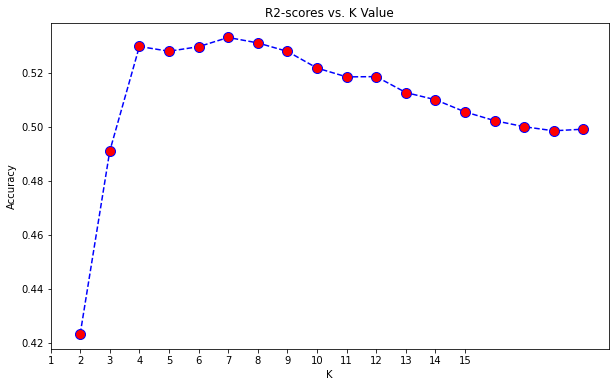

In [911]:
#continuous_df, discrete_df = 
test_functions(df_numerical_train, y_train, df_numerical_test, y_test)
#display(discrete_df.head())

In [ ]:
# I choose k = 4 , with R2 = 0.53

11. You can check also the MLPRegressor for this task!

In [912]:
from sklearn.neural_network import MLPRegressor

In [914]:
mlp = MLPRegressor(random_state=1, max_iter=2000).fit(df_numerical_train, y_train)

In [915]:
y_pred_mlp_train = mlp.predict(df_numerical_train)
y_pred_mlp_test = mlp.predict(df_numerical_test)

print(y_pred_mlp_train)
print(y_pred_mlp_test)

[214.00936855 114.29418427 457.19930816 ... 361.33504912 552.39465559
 859.92592864]
[394.74719578 347.81665748  58.0719092  ... 369.61726261 496.1596002
 542.8068894 ]


In [917]:
mlp.score(df_numerical_test, y_test)

0.8091908073800058

12. Check and discuss the results.

# PART 4 - RANDOM VARIABLES DISTRIBUTION

1. Get the numerical variables from our dataset.

In [918]:
# Let's go back with df2 and non-encoded categorical variables :
df2.head()

,month,weekday,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2,3,0,1,2763.519279,56274.0,69.0,32.0,5.0,384.811147,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
2,2,5,0,2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,1,3,0,7,7645.861827,0.0,106.0,18.0,65.0,529.881344,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2,3,0,1,2813.692575,43836.0,73.0,12.0,44.0,138.130879,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
5,1,1,0,2,8256.297800,62902.0,69.0,14.0,94.0,159.383042,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Two-Door Car,Medsize


In [920]:
df_numericals = df2.select_dtypes(np.number)
df_numericals.head()

,month,weekday,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2,3,0,1,2763.519279,56274.0,69.0,32.0,5.0,384.811147
2,2,5,0,2,12887.431650,48767.0,108.0,18.0,38.0,566.472247
3,1,3,0,7,7645.861827,0.0,106.0,18.0,65.0,529.881344
4,2,3,0,1,2813.692575,43836.0,73.0,12.0,44.0,138.130879
5,1,1,0,2,8256.297800,62902.0,69.0,14.0,94.0,159.383042


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

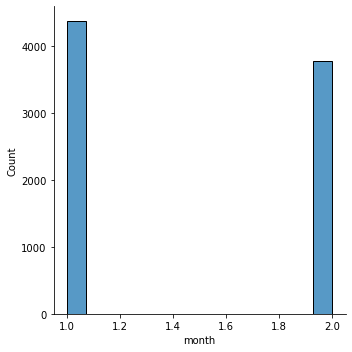

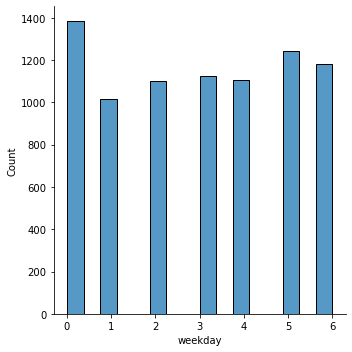

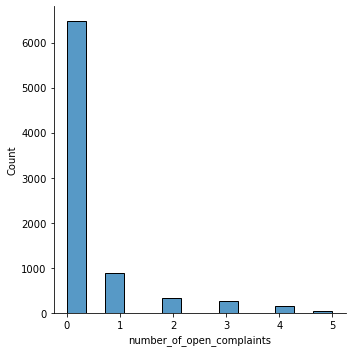

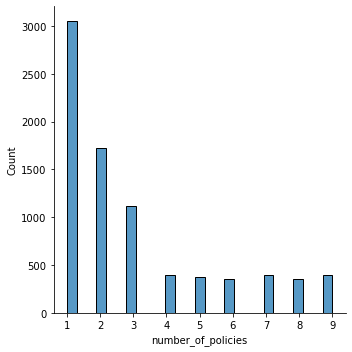

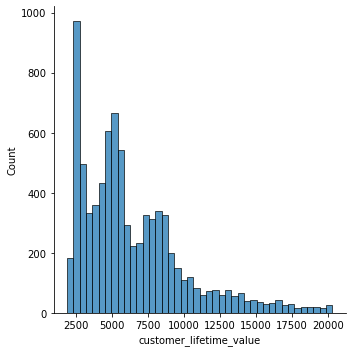

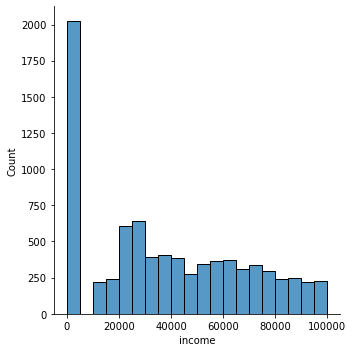

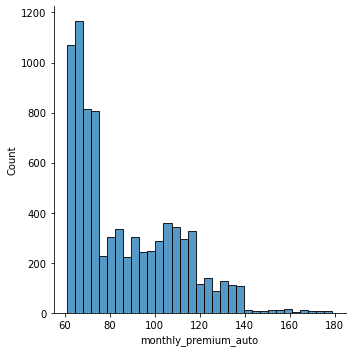

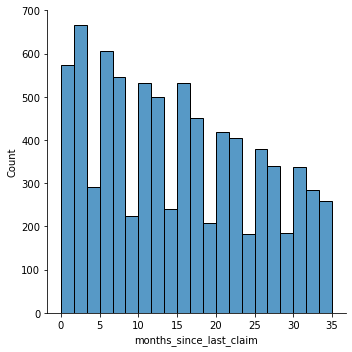

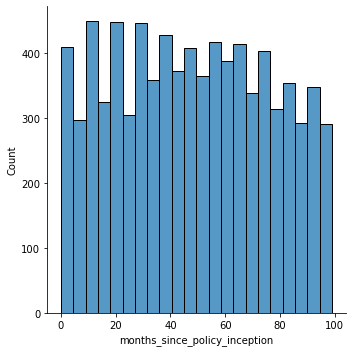

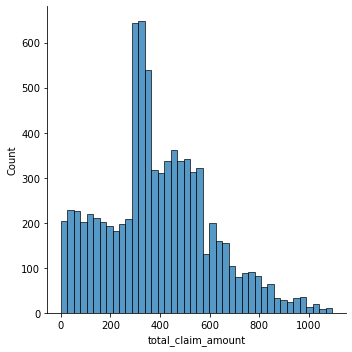

In [923]:
for col in df_numericals.columns :
    sns.displot(df_numericals[col])
    plt.show()

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [928]:
def log_transformation(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/117955666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numericals['monthly_premium_auto'] = df_numericals['monthly_premium_auto'].apply(lambda x :log_transformation(x))


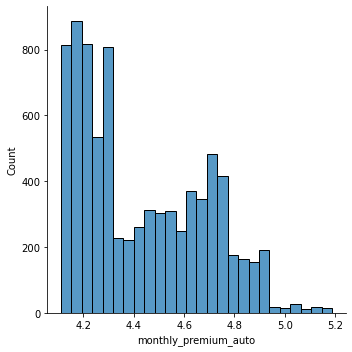

In [933]:
df_numericals['monthly_premium_auto'] = df_numericals['monthly_premium_auto'].apply(lambda x :log_transformation(x))
sns.displot(df_numericals['monthly_premium_auto'])
plt.show()

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/2147861961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numericals['customer_lifetime_value'] = df_numericals['customer_lifetime_value'].apply(lambda x :log_transformation(x))


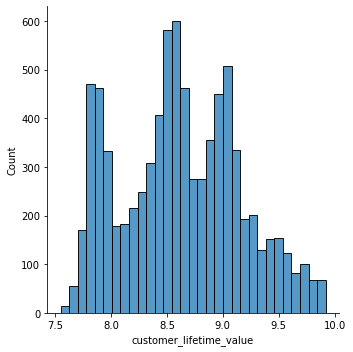

In [930]:
df_numericals['customer_lifetime_value'] = df_numericals['customer_lifetime_value'].apply(lambda x :log_transformation(x))
sns.displot(df_numericals['customer_lifetime_value'])
plt.show()

In [ ]:
PART 5 -